<a href="https://colab.research.google.com/github/anilmala/house-price-prediction-project/blob/main/Copy_of_house_prediction_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.10/dist-packages/numpy/_core/_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


TypeError: 

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset/bengaluru house price.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
a=data["area_type"].value_counts(ascending=False).reset_index()
a

,area_type,count
0,Super built-up Area,8790
1,Built-up Area,2418
2,Plot Area,2025
3,Carpet Area,87


In [ ]:
import matplotlib.pyplot as plt

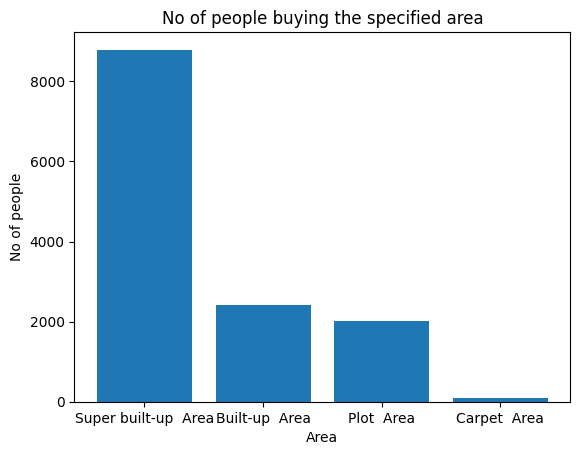

In [ ]:
plt.bar(a["area_type"],a["count"])
plt.title("No of people buying the specified area")
plt.xlabel("Area")
plt.ylabel("No of people")
plt.show()


In [ ]:
b=data["location"].value_counts(ascending=False).reset_index()
c=b[b["count"]>200]
c

,location,count
0,Whitefield,540
1,Sarjapur Road,399
2,Electronic City,302
3,Kanakpura Road,273
4,Thanisandra,234
5,Yelahanka,213


In [ ]:
d=data["size"].value_counts(ascending=False).reset_index()
e=d[d["count"]>200]
e

,size,count
0,2 BHK,5199
1,3 BHK,4310
2,4 Bedroom,826
3,4 BHK,591
4,3 Bedroom,547
5,1 BHK,538
6,2 Bedroom,329
7,5 Bedroom,297


In [ ]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
data["availability"]

,availability
0,19-Dec
1,Ready To Move
2,Ready To Move
3,Ready To Move
4,Ready To Move
...,...
13315,Ready To Move
13316,Ready To Move
13317,Ready To Move
13318,18-Jun


In [ ]:
def anil(x):
  if x=="Ready To Move":
    return x
  else:
    return "not ready to move"

In [ ]:
data["availability1"]=data["availability"].apply(anil)
data.drop("availability",axis=1,inplace=True)
data

,area_type,location,size,society,total_sqft,bath,balcony,price,availability1
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,not ready to move
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ready To Move
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,Ready To Move
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Ready To Move
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,Ready To Move
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Ready To Move
13316,Super built-up Area,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,Ready To Move
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,Ready To Move
13318,Super built-up Area,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,not ready to move


In [ ]:
data["availability1"].value_counts().reset_index()

,availability1,count
0,Ready To Move,10581
1,not ready to move,2739


In [ ]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
def convert(a):
    if isinstance(a, str): # Check if the input is a string
        if "Bedroom" in a:
            c = a[0]
            return c + " " + "BHK"
        else:
          return a
                 # Return the original value if it's not a string

In [ ]:
data["size"].astype(str)

,size
0,2 BHK
1,4 Bedroom
2,3 BHK
3,3 BHK
4,2 BHK
...,...
13315,5 Bedroom
13316,4 BHK
13317,2 BHK
13318,4 BHK


In [ ]:
a="4 Bedroom"
convert(a)


'4 BHK'

In [ ]:
data["size1"]=data["size"].apply(convert)


In [ ]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,availability1,size1
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,not ready to move,2 BHK
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ready To Move,4 BHK
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,Ready To Move,3 BHK
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Ready To Move,3 BHK
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,Ready To Move,2 BHK


In [ ]:
data.drop("size",axis=1,inplace=True)

In [ ]:
data.head()

,area_type,location,society,total_sqft,bath,balcony,price,availability1,size1
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,not ready to move,2 BHK
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,Ready To Move,4 BHK
2,Built-up Area,Uttarahalli,NaN,1440,2.0,3.0,62.00,Ready To Move,3 BHK
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,Ready To Move,3 BHK
4,Super built-up Area,Kothanur,NaN,1200,2.0,1.0,51.00,Ready To Move,2 BHK


In [ ]:
data.isnull().sum()

,0
area_type,0
location,1
society,5502
total_sqft,0
bath,73
balcony,609
price,0
availability1,0
size1,16


In [ ]:
data.drop("society",axis=1,inplace=True)

In [ ]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,availability1,size1
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,not ready to move,2 BHK
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,Ready To Move,4 BHK
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,Ready To Move,3 BHK
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,Ready To Move,3 BHK
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,Ready To Move,2 BHK


In [ ]:
data.isnull().sum()

,0
area_type,0
location,1
total_sqft,0
bath,73
balcony,609
price,0
availability1,0
size1,16


In [ ]:
data.shape

(13320, 8)

In [ ]:
data['balcony'].value_counts()

,count
balcony,
2.0,5113
1.0,4897
3.0,1672
0.0,1029


In [ ]:
data["balcony"].fillna(2,inplace=True)

In [ ]:
data["balcony"].replace(5113.0,2,inplace=True)

In [ ]:
data['balcony'].value_counts()

,count
balcony,
2.0,5722
1.0,4897
3.0,1672
0.0,1029


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
area_type,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
availability1,0
size1,0


In [ ]:
data.rename(columns={"availability1":"availability","size1":"size"},inplace=True)
data.columns

<ipython-input-34-48ffa57d8319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"availability1":"availability","size1":"size"},inplace=True)


Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'availability', 'size'],
      dtype='object')

In [ ]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,availability,size
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,not ready to move,2 BHK
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,Ready To Move,4 BHK
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,Ready To Move,3 BHK
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,Ready To Move,3 BHK
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,Ready To Move,2 BHK


In [ ]:
bb=data["location"].value_counts(ascending=False).reset_index()
bb

,location,count
0,Whitefield,534
1,Sarjapur Road,392
2,Electronic City,302
3,Kanakpura Road,266
4,Thanisandra,233
...,...,...
1299,Vidyapeeta,1
1300,Maruthi Extension,1
1301,Okalipura,1
1302,Old Town,1


In [ ]:
cc=bb[bb["count"]>100]['location']
cc

,location
0,Whitefield
1,Sarjapur Road
2,Electronic City
3,Kanakpura Road
4,Thanisandra
5,Yelahanka
6,Uttarahalli
7,Hebbal
8,Marathahalli
9,Raja Rajeshwari Nagar


In [ ]:
data.shape

(13246, 8)

In [ ]:
cleaned_data=data[data["location"].isin(cc)]
cleaned_data

,area_type,location,total_sqft,bath,balcony,price,availability,size
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,not ready to move,2 BHK
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,Ready To Move,3 BHK
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,Ready To Move,2 BHK
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,Ready To Move,4 BHK
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,Ready To Move,3 BHK
...,...,...,...,...,...,...,...,...
13304,Super built-up Area,Raja Rajeshwari Nagar,1187,2.0,2.0,40.14,Ready To Move,2 BHK
13308,Built-up Area,Bannerghatta Road,1527,3.0,1.0,142.00,Ready To Move,3 BHK
13313,Super built-up Area,Uttarahalli,1345,2.0,1.0,57.00,Ready To Move,3 BHK
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,Ready To Move,5 BHK


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cleaned_data["location1"]=lb.fit_transform(cleaned_data["location"])
cleaned_data.head()

<ipython-input-40-cee5e8f50467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["location1"]=lb.fit_transform(cleaned_data["location"])


,area_type,location,total_sqft,bath,balcony,price,availability,size,location1
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,not ready to move,2 BHK,3
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,Ready To Move,3 BHK,13
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,Ready To Move,2 BHK,14
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,Ready To Move,4 BHK,10
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,Ready To Move,3 BHK,8


In [ ]:
aa=cleaned_data["location1"].value_counts().reset_index()

In [ ]:
bb=cleaned_data["location"].value_counts().reset_index()

In [ ]:
location_new=pd.merge(aa,bb,on="count")
location_new.to_csv("location_new.csv")

In [ ]:
cleaned_data["area_type1"]=lb.fit_transform(cleaned_data["area_type"])
cleaned_data.head()

<ipython-input-44-3f64b6bda041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["area_type1"]=lb.fit_transform(cleaned_data["area_type"])


,area_type,location,total_sqft,bath,balcony,price,availability,size,location1,area_type1
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,not ready to move,2 BHK,3,3
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,Ready To Move,3 BHK,13,0
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,Ready To Move,2 BHK,14,3
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,Ready To Move,4 BHK,10,3
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,Ready To Move,3 BHK,8,3


In [ ]:
aaa=cleaned_data["area_type1"].value_counts().reset_index()
bbb=cleaned_data["area_type"].value_counts().reset_index()
area_new=pd.merge(aaa,bbb,on="count")
area_new

,area_type1,count,area_type
0,3,2681,Super built-up Area
1,0,539,Built-up Area
2,2,240,Plot Area
3,1,14,Carpet Area


In [ ]:
cleaned_data["availability"]=cleaned_data["availability"].replace({"Ready To Move":"1","not ready to move":"0"})
cleaned_data.head()

<ipython-input-46-3618018db549>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["availability"]=cleaned_data["availability"].replace({"Ready To Move":"1","not ready to move":"0"})


,area_type,location,total_sqft,bath,balcony,price,availability,size,location1,area_type1
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,0,2 BHK,3,3
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,1,3 BHK,13,0
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,1,2 BHK,14,3
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,1,4 BHK,10,3
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,1,3 BHK,8,3


In [ ]:
cleaned_data["size1"]=lb.fit_transform(cleaned_data["size"])
cleaned_data.head()

<ipython-input-47-73bed81df66e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["size1"]=lb.fit_transform(cleaned_data["size"])


,area_type,location,total_sqft,bath,balcony,price,availability,size,location1,area_type1,size1
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,0,2 BHK,3,3,1
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,1,3 BHK,13,0,2
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,1,2 BHK,14,3,1
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,1,4 BHK,10,3,3
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,1,3 BHK,8,3,2


In [ ]:
ax=cleaned_data["size1"].value_counts().reset_index()
bx=cleaned_data["size"].value_counts().reset_index()
size_new=pd.merge(ax,bx,on="count")
size_new.to_csv("size_new.csv")

In [ ]:
cleaned_data["total_sqft"]

,total_sqft
0,1056
2,1440
5,1170
7,3300
8,1310
...,...
13304,1187
13308,1527
13313,1345
13315,3453


In [ ]:
cleaned_data.isnull().sum()
cleaned_data.dropna(inplace=True)

<ipython-input-50-8d719527c796>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(inplace=True)


In [ ]:
def convert_range(value):
  if isinstance(value, str) and '-' in value:
    min_val, max_val = value.split('-')
    return (float(min_val) + float(max_val)) / 2
  elif isinstance(value,str):
    #This extracts the number from the string
    temp = ''.join(filter(str.isdigit, value))
    #If there are no digits in the string return 0.0
    if temp=='':
      return 0.0
    else:
      return float(temp)
  else:
    return float(value)
cleaned_data['total_sqft1'] = cleaned_data['total_sqft'].apply(convert_range)

<ipython-input-64-58b4652b4d72>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['total_sqft1'] = cleaned_data['total_sqft'].apply(convert_range)


In [ ]:
x=cleaned_data[["area_type1","location1","availability","size1","total_sqft1","bath","balcony"]]
print(x.isnull().sum())
y=cleaned_data["price"]
y

area_type1      0
location1       0
availability    0
size1           0
total_sqft1     0
bath            0
balcony         0
dtype: int64


,price
0,39.07
2,62.00
5,38.00
7,600.00
8,63.25
...,...
13304,40.14
13308,142.00
13313,57.00
13315,231.00


In [ ]:
from scipy.stats import stats

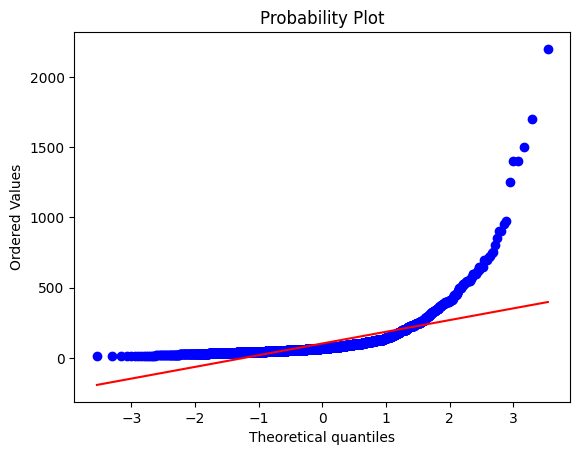

In [ ]:
from scipy import stats # import the stats module from scipy
import matplotlib.pyplot as plt # import the plotting module

stats.probplot(cleaned_data["price"], dist='norm', plot=plt) # call probplot from the stats module
plt.show() # this will display the plot


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
rf.score(x_test,y_test)

0.6942834056949894

In [ ]:
rf.score(x_train,y_train)

0.9525886023357715

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 2970.381388588077
R-squared: 0.6942834056949894


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
svr=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
lr=LinearRegression()
knn=KNeighborsRegressor()

In [ ]:
model_params={'svr':{'models':svr,'params':{'C':[1,10,100],'kernel':['linear','rbf']}},
              'dt':{'models':dt,'params':{'criterion':['squared_error','absolute_error']}}, # Changed the values for criterion parameter
              'rf':{'models':rf,'params':{'n_estimators':[10,50,100]}},
              'lr':{'models':lr,'params':{'fit_intercept':[True,False]}},
              'knn':{'models':knn,'params':{'n_neighbors':[3,5,7]}}
              }



In [ ]:
for a,b in model_params.items():
  print(a)

  print(b['models'])


svr
SVR()
dt
DecisionTreeRegressor()
rf
RandomForestRegressor()
lr
LinearRegression()
knn
KNeighborsRegressor()


In [ ]:
scores=[]

In [ ]:
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['models'],mp['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf})

In [ ]:
scores

[{'model': 'svr',
  'best_score': 0.6131045346813444,
  'best_params': GridSearchCV(cv=5, estimator=SVR(),
               param_grid={'C': [1, 10, 100], 'kernel': ['linear', 'rbf']})},
 {'model': 'svr',
  'best_score': 0.6131045346813444,
  'best_params': GridSearchCV(cv=5, estimator=SVR(),
               param_grid={'C': [1, 10, 100], 'kernel': ['linear', 'rbf']})},
 {'model': 'dt',
  'best_score': 0.5962376293601463,
  'best_params': GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
               param_grid={'criterion': ['squared_error', 'absolute_error']})},
 {'model': 'rf',
  'best_score': 0.6867438157695257,
  'best_params': GridSearchCV(cv=5, estimator=RandomForestRegressor(),
               param_grid={'n_estimators': [10, 50, 100]})},
 {'model': 'lr',
  'best_score': 0.38328047634524814,
  'best_params': GridSearchCV(cv=5, estimator=LinearRegression(),
               param_grid={'fit_intercept': [True, False]})},
 {'model': 'knn',
  'best_score': 0.6767106920161812,
  'be

In [ ]:
import pickle

In [ ]:
pickle.dump(rf,open("model4.sav","wb"))
pickle.load(open("model4.sav","rb"))

RandomForestRegressor()

In [ ]:
import joblib
joblib.dump(rf,"model4.pkl")

['model4.pkl']

In [ ]:
joblib.load("model4.pkl")

In [ ]:
pickle.dump(cleaned_data.to_dict(),open("house.pkl","wb"))
pickle.dump()